This example showcases the Influence function 'Axelrod'

In [3]:
import defSim as ds
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D
import pandas as pd
from IPython.display import display, Math, Latex

# The classic Axelrod (1997) model with homophily

Below we implement a simulation model exactly as in [1].

  * 100 agents
  * Set on a wrapped square lattice
  * Von Neumann neighborhoods (i.e. every agent has 4 neighbors)
  * Each agent has 5 Features (F) with one of 15 possible traits (Q)
 
We add a parameter for *homophily*: $h$ following [2]. This parameter governs the probability of succesful interaction, as a function of cultural overlap. To be precise:

$$
f(x) =\begin{cases}
    (\frac{1}{2})^{1-h}x^h, & \text{if } x\leq .5\\
    1-(\frac{1}{2})^{1-h} (1-x)^h, & \text{if } x \gt .5
\end{cases}
$$

At $h=1$, the relationship between interaction probabiliy and cultural overlap is linear, like in Axelrod's original implementation. For values of $h$ where $0 < h < 1$, we speak of 'less homophily' because agents do not prefer similar neighbors to dissimilar neighbors that much, and when $h>1$ the agents prefer relative similar others.

In [4]:
exp = ds.Experiment(seed=314,
                    influence_function="axelrod",
                    attributes_initializer="random_categorical",
                    attribute_parameters={"num_features": 5,
                                          "num_traits": 15},
                    influence_parameters={"homophily": [0.5, 1, 2]},
                    topology="grid",
                    stop_condition="strict_convergence",
                    max_iterations=1000000,
                    network_parameters={"neighborhood": "von_neumann",
                                        "num_agents": 49},
                    communication_regime=["one-to-one", "one-to-many"],
                    output_realizations=["AverageDistance", "Homogeneity", "Regions", "Isolates", 
                                         "SuccessfullInfluence", "Ticks"],
                    repetitions=10)
my_results = exp.run(parallel=True)

60 different parameter combinations


In [10]:
my_results = pd.read_csv("/Users/marijnkeijzer/SURFdrive/positionpaper/slurm_simulations/axelrodWithHomophily.csv")

In [6]:
print(my_results)

    index  AverageDistance  Homogeneity  Isolates  Regions   Seed  \
0       0         0.142857     0.897959         0        3  35746   
1       0         0.142857     0.877551         0        3  69807   
2       0         0.224490     0.795918         2        4  24610   
3       0         0.204082     0.877551         3        5  33034   
4       0         0.295918     0.795918         4        7  10345   
5       0         0.418367     0.632653         4        8  92635   
6       0         0.040816     0.979592         1        2  92331   
7       0         0.000000     1.000000         0        1  48288   
8       0         0.081633     0.959184         2        3  40701   
9       0         0.102041     0.938776         1        3  62598   
10      0         0.459184     0.448980         3        8  37223   
11      0         0.224490     0.836735         1        4  63231   
12      0         0.561224     0.448980         9       13  81666   
13      0         0.122449     0.9

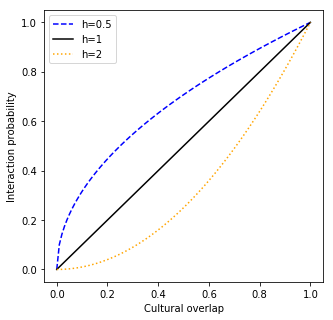

In [2]:
x = np.linspace(0,1,100)
hom05 = x ** 0.5
hom1 = x ** 1
hom2 = x ** 2

fig, ax = plt.subplots(figsize=[5, 5])

ax.plot(x, hom05, 'blue', ls="--")
ax.plot(x, hom1, 'black', ls="-")
ax.plot(x, hom2, 'orange', ls=":")

custom_lines = [Line2D([0], [0], color='blue', ls='--'),
                Line2D([0], [0], color='black', ls='-'),
                Line2D([0], [0], color='orange', ls=':')]
ax.legend(custom_lines, ['h=0.5', 'h=1', 'h=2'])

plt.ylabel("Interaction probability")
plt.xlabel("Cultural overlap")

plt.savefig('/Users/marijnkeijzer/Desktop/personalized_axelrod_homopar.png', dpi=144)

plt.show()

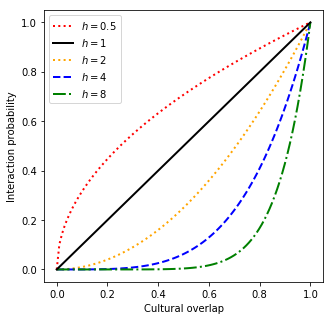

In [93]:
x = np.linspace(0,1,100)
hom05 = x ** 0.5
hom1 = x ** 1
hom2 = x ** 2
hom4 = x ** 4
hom8 = x ** 8

fig, ax = plt.subplots(figsize=[5, 5])

ax.plot(x, hom05, 'red', ls=":", lw=2)
ax.plot(x, hom2, 'orange', ls=":", lw=2)
ax.plot(x, hom4, 'blue', ls="--", lw=2)
ax.plot(x, hom8, 'green', ls="-.", lw=2)
ax.plot(x, hom1, 'black', ls="-", lw=2)

custom_lines = [Line2D([0], [0], color='red', ls=":", lw=2),
                Line2D([0], [0], color='black', ls='-', lw=2),
                Line2D([0], [0], color='orange', ls=':', lw=2),
                Line2D([0], [0], color='blue', ls='--', lw=2),
                Line2D([0], [0], color='green', ls='-.', lw=2)]
ax.legend(custom_lines, [r'$h=0.5$', r'$h=1$', r'$h=2$', r'$h=4$', r'$h=8$'])

plt.ylabel("Interaction probability")
plt.xlabel("Cultural overlap")

plt.savefig('/Users/marijnkeijzer/SURFdrive/positionpaper/slurm_simulations/HomophilyFunc.png', dpi=144)

plt.show()

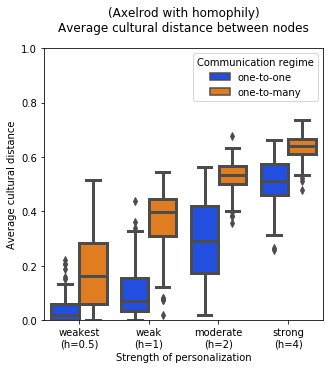

In [11]:
plt.figure(figsize=[5, 5])

plt.title('(Axelrod with homophily)\nAverage cultural distance between nodes', y=1.04)
ax = sns.boxplot(x="homophily", y="AverageDistance", hue="communication_regime",
                 data=my_results, palette='bright', linewidth=3)
ax.legend().set_title('Communication regime')
ax.set(ylim=[0, 1],
       xlabel='Strength of personalization', 
       ylabel='Average cultural distance',
       xticklabels=['weakest\n(h=0.5)', 'weak\n(h=1)', 'moderate\n(h=2)', 'strong\n(h=4)', 'strongest\n(h=8)'])

plt.savefig('/Users/marijnkeijzer/SURFdrive/positionpaper/slurm_simulations/AverageDistance.png', dpi=144)

plt.show()

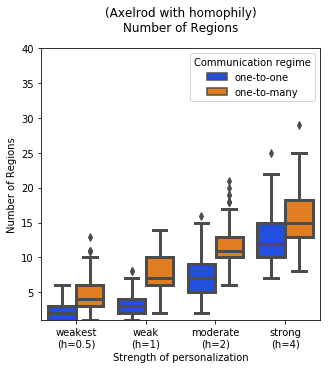

In [13]:
plt.figure(figsize=[5, 5])

plt.title('(Axelrod with homophily)\nNumber of Regions', y=1.04)
ax = sns.boxplot(x="homophily", y="Regions", hue="communication_regime",
                 data=my_results, palette='bright', linewidth=3)
ax.legend().set_title('Communication regime')
ax.set(ylim=[1, 40],
       xlabel='Strength of personalization', 
       ylabel='Number of Regions',
       xticklabels=['weakest\n(h=0.5)', 'weak\n(h=1)', 'moderate\n(h=2)', 'strong\n(h=4)', 'strongest\n(h=8)'])

plt.savefig('/Users/marijnkeijzer/SURFdrive/positionpaper/slurm_simulations/Regions.png', dpi=144)

plt.show()

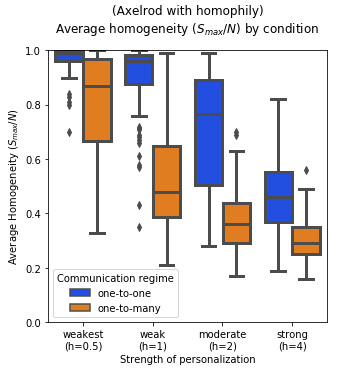

In [14]:
plt.figure(figsize=[5, 5])

plt.title('(Axelrod with homophily)\n' + r'Average homogeneity ($S_{max} / N$) by condition', y=1.04)
ax = sns.boxplot(x="homophily", y="Homogeneity", hue="communication_regime",
                 data=my_results, palette='bright', linewidth=3)
ax.legend().set_title('Communication regime')
ax.set(ylim=[0, 1],
       xlabel='Strength of personalization', 
       ylabel=r'Average Homogeneity ($S_{max} / N)$',
       xticklabels=['weakest\n(h=0.5)', 'weak\n(h=1)', 'moderate\n(h=2)', 'strong\n(h=4)', 'strongest\n(h=8)'])

plt.savefig('/Users/marijnkeijzer/SURFdrive/positionpaper/slurm_simulations/Homogeneity.png', dpi=144)

plt.show()

In [63]:
my_results["DNC"] = [1 if x==9999999 else 0 for x in my_results["Ticks"]]

summ_df = my_results.groupby(["communication_regime", "homophily"]).mean()

print(summ_df["DNC"])
print(summ_df["SuccessfulInfluence"])

communication_regime  homophily
one-to-many           0.5          0.0
                      1.0          0.0
                      2.0          0.0
                      4.0          0.0
                      8.0          1.0
one-to-one            0.5          0.0
                      1.0          0.0
                      2.0          0.0
                      4.0          0.0
                      8.0          1.0
Name: DNC, dtype: float64
communication_regime  homophily
one-to-many           0.5             5000.26
                      1.0             4586.00
                      2.0             7035.09
                      4.0            72808.79
                      8.0          1318364.08
one-to-one            0.5            18846.05
                      1.0            15735.43
                      2.0             8087.21
                      4.0             4014.44
                      8.0               70.98
Name: SuccessfulInfluence, dtype: float64


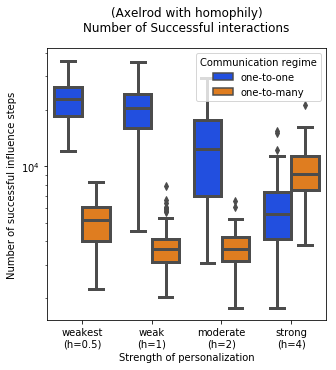

In [15]:
plt.figure(figsize=[5, 5])

plt.title('(Axelrod with homophily)\nNumber of Successful interactions', y=1.04)
ax = sns.boxplot(x="homophily", y="SuccessfulInfluence", hue="communication_regime",
                 data=my_results, palette='bright', linewidth=3)
ax.legend().set_title('Communication regime')
ax.set(#ylim=[0, 10**5],
       xlabel='Strength of personalization', 
       ylabel='Number of successful influence steps',
       xticklabels=['weakest\n(h=0.5)', 'weak\n(h=1)', 'moderate\n(h=2)', 'strong\n(h=4)', 'strongest\n(h=8)'])
ax.set_yscale('log')
plt.savefig('/Users/marijnkeijzer/SURFdrive/positionpaper/slurm_simulations/SIabs.png', dpi=144)

plt.show()

In [17]:
my_results["SIprop"] = my_results["SuccessfulInfluence"] / my_results["Ticks"]

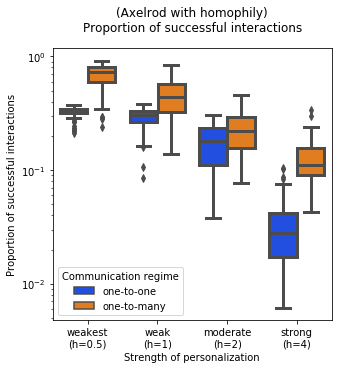

In [18]:
plt.figure(figsize=[5, 5])

plt.title('(Axelrod with homophily)\nProportion of successful interactions', y=1.04)
ax = sns.boxplot(x="homophily", y="SIprop", hue="communication_regime",
                 data=my_results, palette='bright', linewidth=3)
ax.legend().set_title('Communication regime')
ax.set(#ylim=[0, 10**5],
       xlabel='Strength of personalization', 
       ylabel='Proportion of successful interactions',
       xticklabels=['weakest\n(h=0.5)', 'weak\n(h=1)', 'moderate\n(h=2)', 'strong\n(h=4)', 'strongest\n(h=8)'])
ax.set_yscale('log')
plt.savefig('/Users/marijnkeijzer/SURFdrive/positionpaper/slurm_simulations/SIprop.png', dpi=144)

plt.show()

---

**References**

[1] ﻿Axelrod, Robert M. 1997. “The Dissemination of Culture: A Model with Local Convergence and Global Polarization.” *Journal of Conflict Resolution* 41(2):203–26.

[2] ﻿Takács, Károly, Andreas Flache, and Michael Mäs. 2016. “Discrepancy and Disliking Do Not Induce Negative Opinion Shifts.” *PLoS One* 11(6):1–21.